# Análise de Voos desviados

## Importando Bibliotecas

In [1]:
# Ignorar avisos 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carregando o Banco de Dados

In [3]:
original = pd.read_csv('DelayedFlights.zip')

In [4]:
# Total de Registros
Total_Registros = len(original)

In [6]:
voos_desviados = pd.read_csv('voos_desviados.zip')

In [7]:
# Total de Desviados
Total_desviados= len(voos_desviados)

In [9]:
print(f'A Porcentagem de voos cancelados em 2008: {round(100*Total_desviados/Total_Registros,4)}%')

A Porcentagem de voos cancelados em 2008: 0.3899%


In [12]:
voos_desviados.shape

(7551, 6)

Verificar a quantidade de linhas com valores nulos

In [11]:
voos_desviados.isnull().sum().sort_values(ascending=False)

Month         0
DayofMonth    0
DayOfWeek     0
DepDelay      0
Origin        0
Dest          0
dtype: int64

In [13]:
voos_desviados.nunique()

Month          12
DayofMonth     31
DayOfWeek       7
DepDelay      367
Origin        220
Dest          241
dtype: int64

In [14]:
lista_var_continuas = ['DepDelay']
lista_var_discretas = ['Month','DayofMonth','DayOfWeek']

In [15]:
print(voos_desviados.describe())

             Month   DayofMonth    DayOfWeek     DepDelay
count  7551.000000  7551.000000  7551.000000  7551.000000
mean      6.530526    15.969143     3.946894    62.881473
std       3.685963     8.744783     1.977278    73.981128
min       1.000000     1.000000     1.000000     6.000000
25%       3.000000     8.000000     2.000000    16.000000
50%       6.000000    16.000000     4.000000    37.000000
75%      10.000000    23.000000     6.000000    82.000000
max      12.000000    31.000000     7.000000  1154.000000


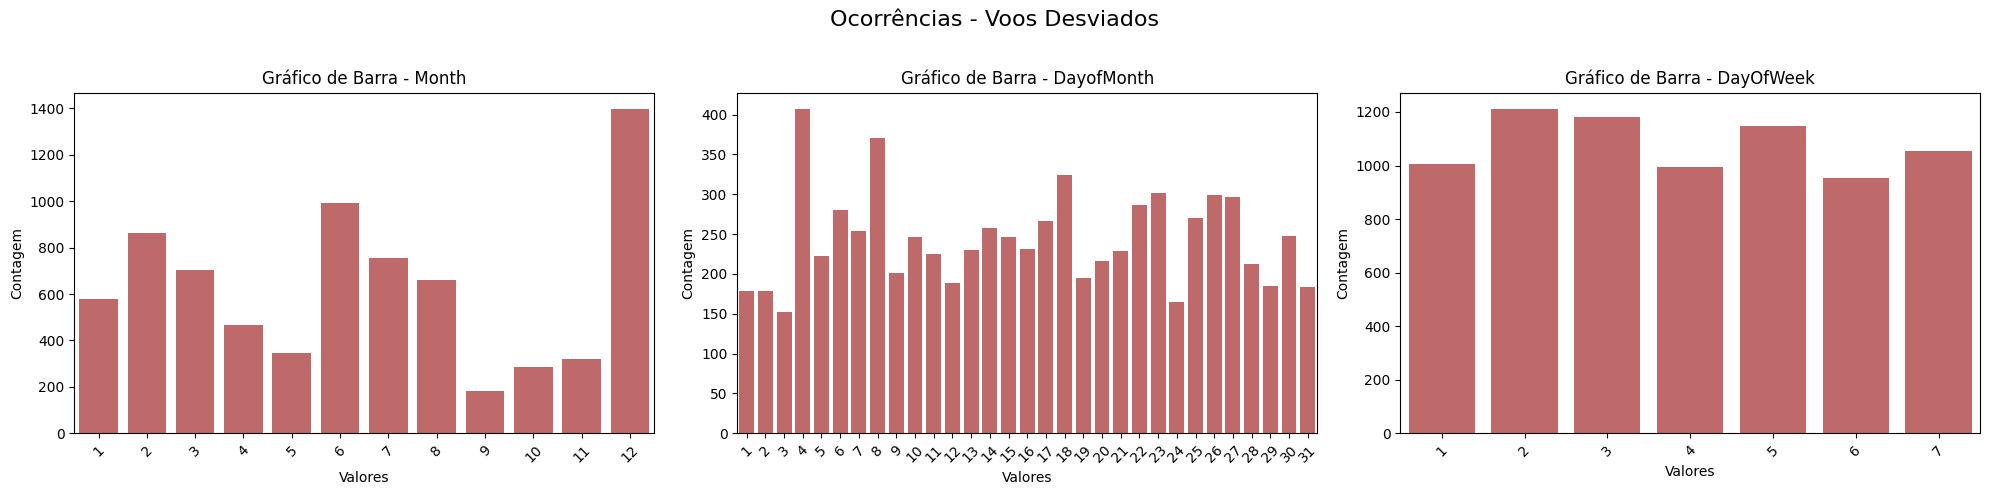

In [16]:
# Criar gráficos de barra para variáveis discretas
fig, axs =plt.subplots(1,3, figsize = (20,5))

for i, ax in zip(lista_var_discretas, axs.flatten()):
    sns.countplot(x=i, data=voos_desviados[[i]], ax=ax, color='IndianRed')
    ax.set_title(f'Gráfico de Barra - {i}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Contagem')
    # Ajusta a rotação dos rótulos para melhor legibilidade
    ax.tick_params(axis='x', rotation=45)
# Adiciona um título geral acima dos subgráficos
fig.suptitle('Ocorrências - Voos Desviados', fontsize=16)

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

# Exibe a figura
plt.show()

Há grande variação entre os meses do ano e os dias do mês de voos desviados.
O mês com menos voos desviados foi setembro e com mais voos desviados foi dezembro. Já entre os dias do mês, destaca-se o dia 4 e 8 com as maiores contagens de voos desviados. Já a análise dos dias da semana, a amplitude foi baixa. 

In [17]:
df_num = voos_desviados.select_dtypes(include=['int64', 'float64'])
df_num.corr()

,Month,DayofMonth,DayOfWeek,DepDelay
Month,1.000000,0.195800,0.008391,-0.014175
DayofMonth,0.195800,1.000000,0.097503,-0.020367
DayOfWeek,0.008391,0.097503,1.000000,-0.021505
DepDelay,-0.014175,-0.020367,-0.021505,1.000000


Correlação utilizando o pairplot

<Figure size 1000x600 with 0 Axes>

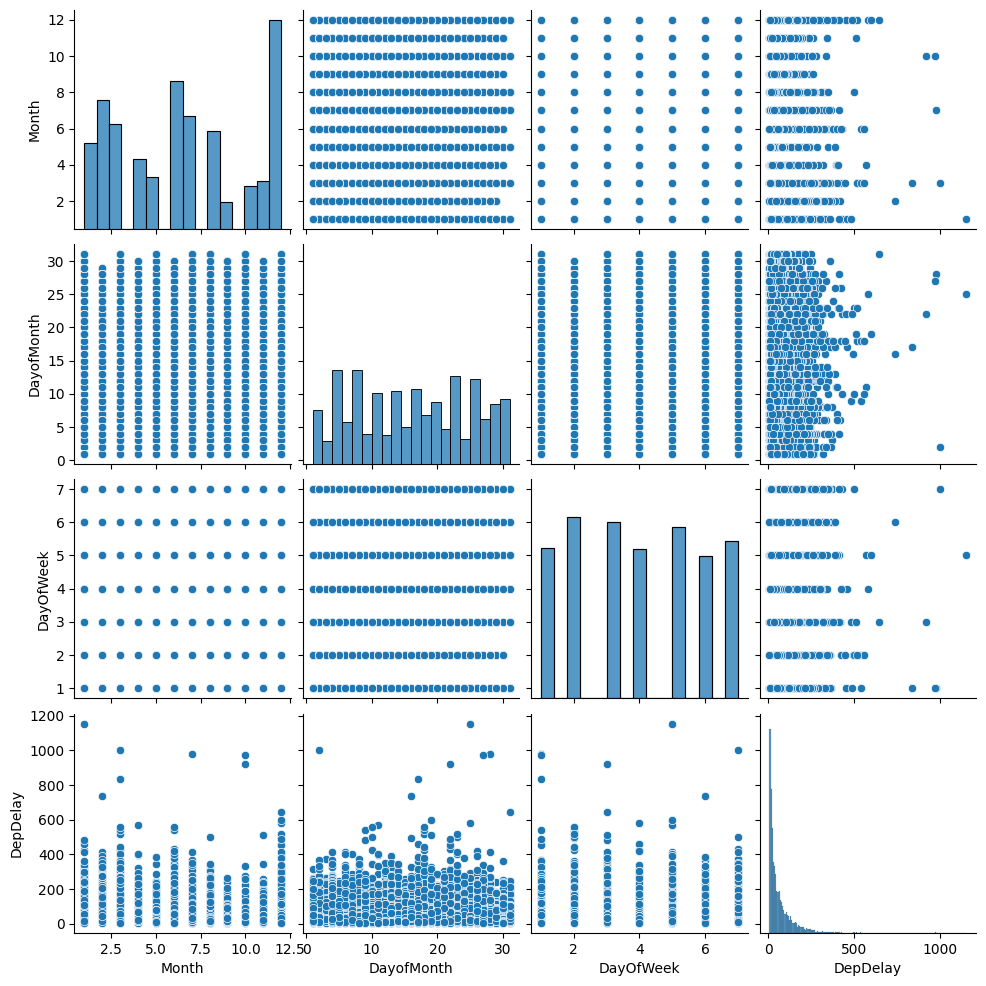

In [18]:
#Possível observar o tipo de correlação entre as variaveis 

plt.figure(figsize=(10, 6))
sns.pairplot(df_num)
plt.show() 

A única relação forte que há é entre a distância e o tempo estimado de voo. Pois quanto maior a distância maior será o tempo estimado de voo.

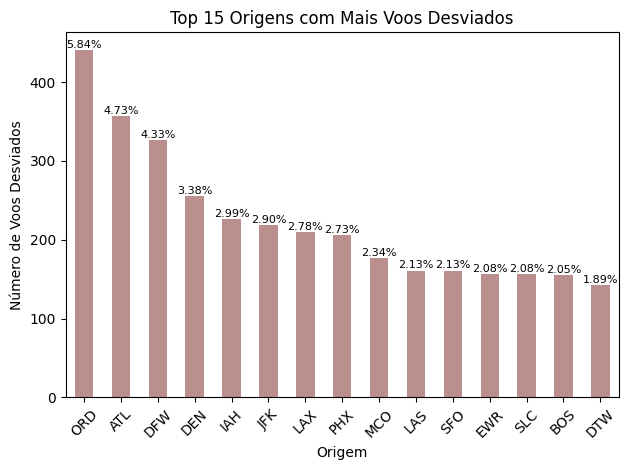

In [19]:
# Origem com mais voos desviados
voos_desviados['Origin'].value_counts().nlargest(15).plot(kind='bar', color='RosyBrown')

# Calculando contagens e porcentagens
contagens = voos_desviados['Origin'].value_counts().nlargest(15)
total_voos_desviados = len(voos_desviados)
porcentagens = (contagens / total_voos_desviados) * 100
# Adicionando rótulos e título
plt.title('Top 15 Origens com Mais Voos Desviados')
plt.xlabel('Origem')
plt.ylabel('Número de Voos Desviados')

for i, v in enumerate(contagens):
    porcentagem = porcentagens.iloc[i]
    plt.text(i, v + 0.1, f'{porcentagem:.2f}%', ha='center', va='bottom', fontsize=8)


# Melhorando a estética do gráfico
plt.xticks(rotation=45)  # Rotacionando os rótulos no eixo x para melhor legibilidade
plt.tight_layout()  # Ajustando o layout para evitar sobreposição

# Exibindo o gráfico
plt.show()

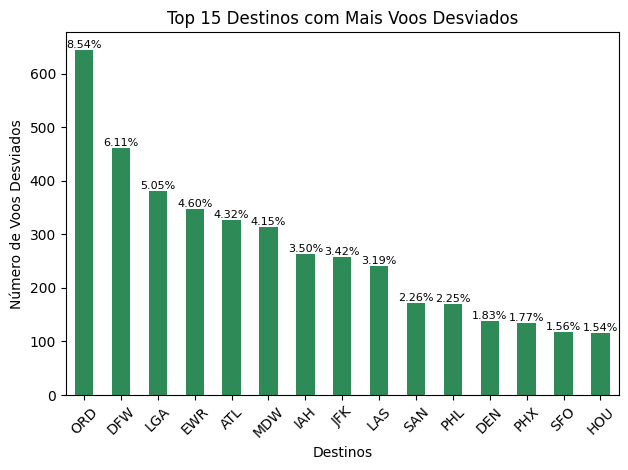

In [20]:
# Origem com mais voos desviados
voos_desviados['Dest'].value_counts().nlargest(15).plot(kind='bar', color='seagreen')

# Calculando contagens e porcentagens
contagens = voos_desviados['Dest'].value_counts().nlargest(15)
total_voos_desviados = len(voos_desviados)
porcentagens = (contagens / total_voos_desviados) * 100
# Adicionando rótulos e título
plt.title('Top 15 Destinos com Mais Voos Desviados')
plt.xlabel('Destinos')
plt.ylabel('Número de Voos Desviados')

for i, v in enumerate(contagens):
    porcentagem = porcentagens.iloc[i]
    plt.text(i, v + 0.1, f'{porcentagem:.2f}%', ha='center', va='bottom', fontsize=8)


# Melhorando a estética do gráfico
plt.xticks(rotation=45)  # Rotacionando os rótulos no eixo x para melhor legibilidade
plt.tight_layout()  # Ajustando o layout para evitar sobreposição

# Exibindo o gráfico
plt.show()

Quando analisado a origem e o destino dos voos desviados, o Aeroporto Internacional O'Hare (ORD) apresentou as maiores ocorrência. Como o aeroporto se localiza em Chicago, que apresenta condições de climas desfavoráveis para voos, como geada e ventos fortes, o clima pode ter sido a causa dos desvios.

In [21]:
contagens_normalizadas = voos_desviados['Month'].value_counts()
print(contagens_normalizadas)

Month
12    1397
6      993
2      865
7      757
3      704
8      659
1      577
4      466
5      347
11     321
10     285
9      180
Name: count, dtype: int64


voos cancelados em todos os meses do ano

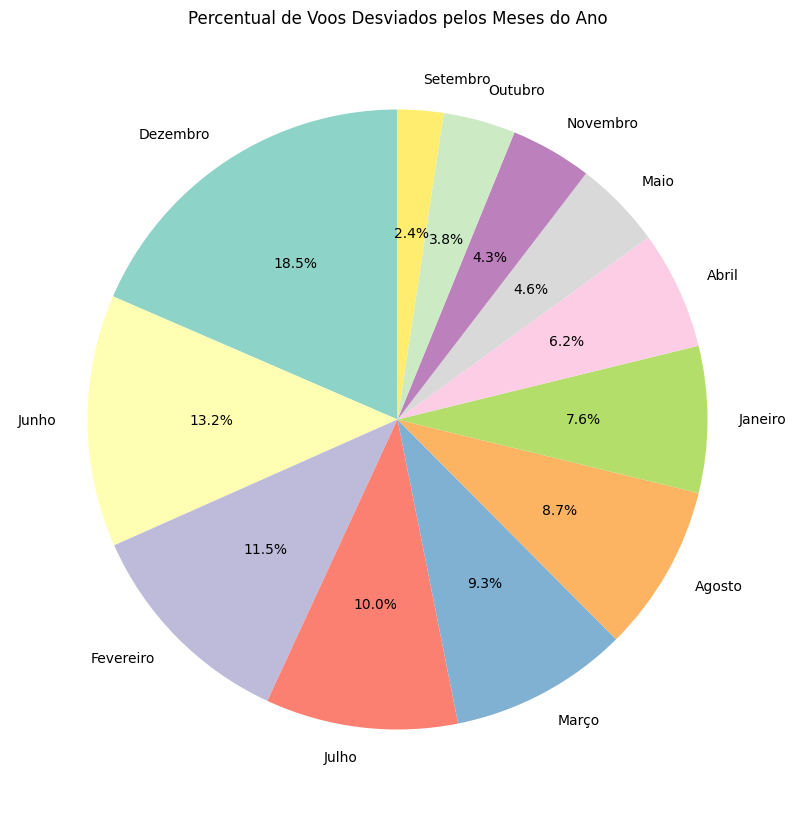

In [22]:
# colocanos na ordem apresentadas no value_counts
meses_do_ano = ['Dezembro', 'Junho', 'Fevereiro',
                'Julho','Março', 'Agosto', 'Janeiro',
                'Abril', 'Maio','Novembro','Outubro', 'Setembro']
colors = plt.cm.Set3(range(len(meses_do_ano)))
# Criando o gráfico de pizza
plt.figure(figsize=(10, 20))
plt.pie(contagens_normalizadas, labels=meses_do_ano, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentual de Voos Desviados pelos Meses do Ano')
plt.show()

In [23]:
contagens_normalizadas = voos_desviados['DayOfWeek'].value_counts(normalize=True) * 100
print(contagens_normalizadas)

DayOfWeek
2    16.037611
3    15.653556
5    15.203284
7    13.971659
1    13.322739
4    13.177063
6    12.634088
Name: proportion, dtype: float64


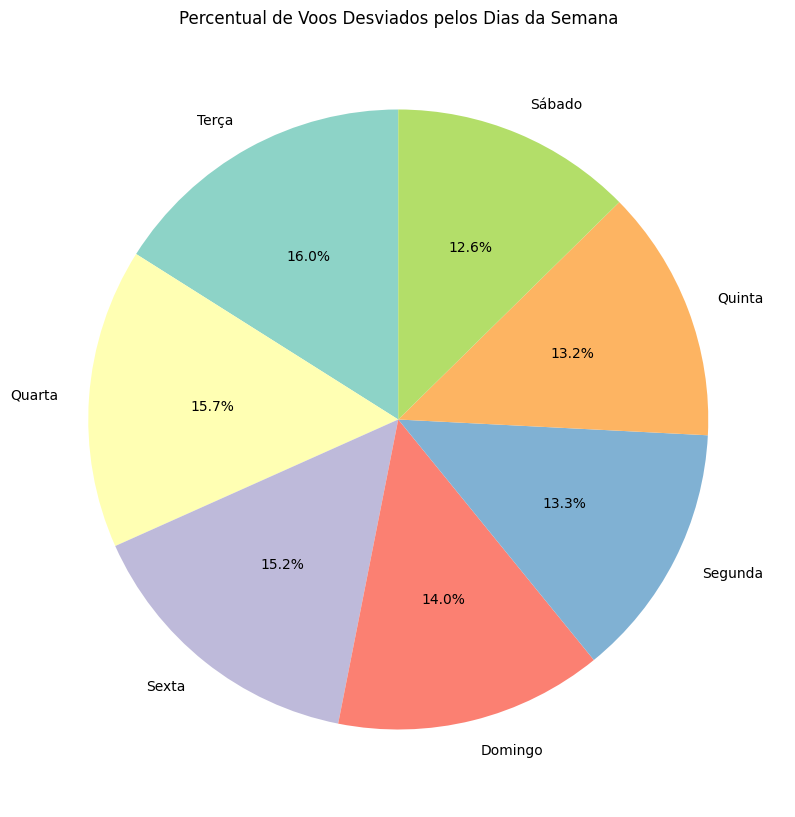

In [24]:
# colocanos na ordem apresentadas no value_counts
dias_da_semana = ['Terça', 'Quarta', 'Sexta',
                'Domingo','Segunda', 'Quinta', 'Sábado']
colors = plt.cm.Set3(range(len(meses_do_ano)))
# Criando o gráfico de pizza
plt.figure(figsize=(10, 20))
plt.pie(contagens_normalizadas, labels=dias_da_semana, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentual de Voos Desviados pelos Dias da Semana')
plt.show()